In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder


In [31]:
test=pd.read_csv(r"test.csv")
train=pd.read_csv(r"train.csv")

# Análisis de datos

In [32]:
# Quitamos algunos valores extremos

#train.drop(train.index[[523, 1298]], axis=0, inplace=True)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [33]:
saleprice_train = train["SalePrice"].copy()
ids_train = train["Id"].copy()
train_original = train.copy()

saleprice_train_log=np.log(train["SalePrice"]).copy()
train = train.drop(["Id", "SalePrice"], axis=1)


In [34]:

ids_test = test["Id"].copy()

test = test.drop(["Id"], axis=1)

train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


# Limpieza de datos

In [35]:
# Ponemos los tipos de ordinario y nom correctamente

variables_ord = ["LotShape",
"Utilities",
"LandSlope",
"OverallQual",
"OverallCond",
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"HeatingQC",
"Electrical",
"KitchenQual",
"Functional",
"FireplaceQu",
"GarageFinish",
"GarageQual",
"GarageCond",
"PavedDrive",
"PoolQC",
"Fence",
]

variables_nom=["MSSubClass",
"MSZoning",
"Street",
"Alley",
"LandContour",
"LotConfig",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"MasVnrType",
"Foundation",
"Heating",
"CentralAir",
"GarageType",
"MiscFeature",
"MiscVal",
"SaleType",
"SaleCondition",
]

for n in variables_ord + variables_nom:
    train[n] = train[n].astype(str)
    test[n] = test[n].astype(str)

In [36]:
total_num = len(train_original["LotArea"])
Prop_nul= train_original.isnull().sum()/total_num
Prop_nul.sort_values(ascending=False) #Proporción de valores nulos en las variables
#Prop_nul["PoolQC"]

train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,nan,Reg,Lvl,AllPub,FR2,...,0,0,nan,nan,nan,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,nan,IR1,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,nan,IR1,Lvl,AllPub,Corner,...,0,0,nan,nan,nan,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,nan,IR1,Lvl,AllPub,FR2,...,0,0,nan,nan,nan,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,MnPrv,nan,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,4,2010,WD,Normal


## Tiramos las columnas con muchos valores nulos

In [37]:
train.dropna(thresh=0.3*total_num, axis=1, inplace=True) #Descartamos las columnas que tienen más del 30% de valores nulos
train_col_nn= train.select_dtypes(exclude=[np.number])
train_col_n = train.select_dtypes(include=[np.number])

for c in train.columns:
    if c in train_col_n:
        train[c].replace(np.nan,train[c].mean(), inplace=True)
    else:
        train[c].replace(np.nan,train[c].mode().iloc[0], inplace=True)

train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,nan,Reg,Lvl,AllPub,FR2,...,0,0,nan,nan,nan,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,nan,IR1,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,nan,IR1,Lvl,AllPub,Corner,...,0,0,nan,nan,nan,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,nan,IR1,Lvl,AllPub,FR2,...,0,0,nan,nan,nan,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,MnPrv,nan,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,4,2010,WD,Normal


In [38]:
test.dropna(thresh=0.3*total_num, axis=1, inplace=True) #Descartamos las columnas que tienen más del 30% de valores nulos
test_col_nn= test.select_dtypes(exclude=[np.number])
test_col_n = test.select_dtypes(include=[np.number])

for c in train.columns:
    if c in test_col_n:
        test[c].replace(np.nan,test[c].mean(), inplace=True)
    else:
        test[c].replace(np.nan,test[c].mode().iloc[0], inplace=True)

test



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,nan,Reg,Lvl,AllPub,Inside,...,120,0,nan,MnPrv,nan,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,nan,IR1,Lvl,AllPub,Corner,...,0,0,nan,nan,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,nan,IR1,Lvl,AllPub,Inside,...,0,0,nan,MnPrv,nan,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,nan,IR1,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,nan,IR1,HLS,AllPub,Inside,...,144,0,nan,nan,nan,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,MnPrv,Shed,700,7,2006,WD,Normal


## Reconvertimos las columnas categóricas nominales y ordinales

In [39]:

la_lista = ['MSSubClass',
'MSZoning',
'Street',
'Alley',
'LandContour',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'CentralAir',
'GarageType',
'MiscFeature',
'MiscVal',
'SaleType',
'SaleCondition', "LotShape"]

print(f"1. shape: {train.shape} cols: {train.columns[:1]}")
print(f"1. shape: {test.shape} cols: {test.columns[:1]}")

for col_name in la_lista:
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(train[[col_name]])
    columns_names = [f"{col_name}_"+str(item) for item in oe_style.categories_[0]]
    #print(columns_names)
    df_to_add = pd.DataFrame(oe_results.toarray(), columns=columns_names)
    train = pd.concat([train, df_to_add], axis=1)
    train.drop([col_name], axis=1, inplace=True)

    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(test[[col_name]])
    columns_names = [f"{col_name}_"+str(item) for item in oe_style.categories_[0]]
    #print(columns_names)
    df_to_add = pd.DataFrame(oe_results.toarray(), columns=columns_names)
    test = pd.concat([test, df_to_add], axis=1)
    test.drop([col_name], axis=1, inplace=True)
    
    train_col_nn.pop(col_name)


# We add/remove variables that could be missing from train to test or vice versa:
print(f"shape: {train.shape} cols: {train.columns[1:]}")
print(f"shape: {test.shape} cols: {test.columns[1:]}")
print(f"train num: {len(train.columns)} test num: {len(test.columns)}")
train_m_test = [c for c in train.columns if not c in test.columns]
test_m_train = [c for c in test.columns if not c in train.columns]

test.drop(test_m_train, axis=1, inplace=True)
for col_missing_name in train_m_test:
    test[col_missing_name] = 0 # Add column filled wit zeros


print(f"in train but not in test: {train_m_test}")
print(f"in test but not in train: {test_m_train}")

for nombre in train_col_nn:
    lbl = LabelEncoder() 
    
    lbl.fit(list(train[nombre].values)) 
    train[nombre] = lbl.transform(list(train[nombre].values))       #Por si me he dejado algo
    
    lbl.fit(list(test[nombre].values)) 
    test[nombre] = lbl.transform(list(test[nombre].values))

1. shape: (1460, 79) cols: Index(['MSSubClass'], dtype='object')
1. shape: (1459, 79) cols: Index(['MSSubClass'], dtype='object')
shape: (1460, 258) cols: Index(['LotArea', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg'],
      dtype='object', length=257)
shape: (1459, 254) cols: Index(['LotArea', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3',
       '

In [40]:
train

,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,65.0,8450,0,0,7,4,2003,2003,196.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,80.0,9600,0,0,6,7,1976,1976,0.0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,68.0,11250,0,0,7,4,2001,2002,162.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,60.0,9550,0,0,7,4,1915,1970,0.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,84.0,14260,0,0,8,4,2000,2000,350.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0,0,6,4,1999,2000,0.0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1456,85.0,13175,0,0,6,5,1978,1988,119.0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1457,66.0,9042,0,0,7,8,1941,2006,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1458,68.0,9717,0,0,5,5,1950,1996,0.0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [41]:
print(f"shape: {train.shape} cols: {train.columns}")
print(f"shape: {test.shape} cols: {test.columns}")

shape: (1460, 258) cols: Index(['LotFrontage', 'LotArea', 'Utilities', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg'],
      dtype='object', length=258)
shape: (1459, 258) cols: Index(['LotFrontage', 'LotArea', 'Utilities', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'MiscVal_1400', 'MiscVal_15500', 'MiscVal_350', 'MiscVal_3500',
       'MiscVal_480', 'MiscVal_54', 'MiscVal_560', 'MiscVal_620',
       'MiscVal_800', 'MiscVal_8300'],
      dtype='object', length=258)


In [42]:
print(f"shape: {test.shape} cols: {test.columns}")


shape: (1459, 258) cols: Index(['LotFrontage', 'LotArea', 'Utilities', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'MiscVal_1400', 'MiscVal_15500', 'MiscVal_350', 'MiscVal_3500',
       'MiscVal_480', 'MiscVal_54', 'MiscVal_560', 'MiscVal_620',
       'MiscVal_800', 'MiscVal_8300'],
      dtype='object', length=258)


In [43]:
list(set(train.columns) - set(test.columns))

[]

YearBuilt GarageYrBlt : 0.78
YearBuilt SalePrice : 0.59 < ADD
GarageYrBlt SalePrice : 0.50 < REMOVE
YearBuilt has 0.00% proportion of NaN in the original dataset
GarageYrBlt has 5.55% proportion of NaN in the original dataset
------------------------------------------------ 

TotalBsmtSF 1stFlrSF : 0.82
TotalBsmtSF SalePrice : 0.61 < ADD
1stFlrSF SalePrice : 0.60 < REMOVE
TotalBsmtSF has 0.00% proportion of NaN in the original dataset
1stFlrSF has 0.00% proportion of NaN in the original dataset
------------------------------------------------ 

2ndFlrSF HouseStyle_2Story : 0.81
2ndFlrSF SalePrice : 0.32 < ADD
HouseStyle_2Story SalePrice : 0.26 < REMOVE
2ndFlrSF has 0.00% proportion of NaN in the original dataset
HouseStyle_2Story has 0.00% proportion of NaN in the original dataset
------------------------------------------------ 

GrLivArea TotRmsAbvGrd : 0.83
GrLivArea SalePrice : 0.70 < ADD
TotRmsAbvGrd SalePrice : 0.53 < REMOVE
GrLivArea has 0.00% proportion of NaN in the original d

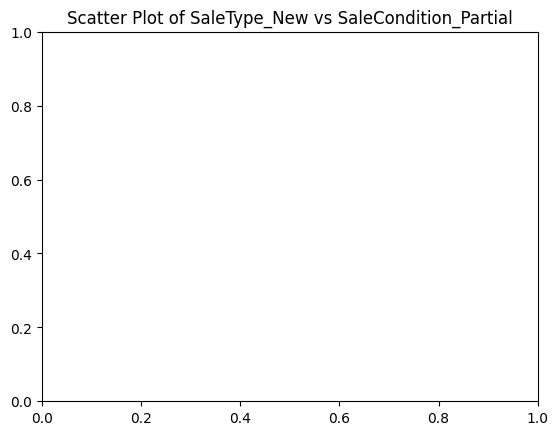

In [44]:
CorrMatrix = train.corr()
CorrMatrixT = CorrMatrix.where(np.triu(np.ones(CorrMatrix.shape), k=1).astype(bool))

row_indices, col_indices = np.where(CorrMatrixT > 0.7)
to_remove = []
for i, j in zip(row_indices, col_indices):

    row_name = CorrMatrixT.iloc[i, :].name #row
    col_name = CorrMatrixT.iloc[:, j].name #col
    corr_val = CorrMatrixT.iloc[i, j] #corr value

    corr_with_sp1 = saleprice_train_log.corr(train[row_name])
    corr_with_sp2 = saleprice_train_log.corr(train[col_name])

    if abs(corr_with_sp1) > abs(corr_with_sp2):
       select1 = "< ADD"
    else:
        select1 = "< REMOVE"
        to_remove.append(row_name)

    if abs(corr_with_sp2) > abs(corr_with_sp1):
       select2 = "< ADD"
    else:
        select2 = "< REMOVE"
        to_remove.append(col_name)

    #df = pd.concat([train[row_name], train[col_name]], axis=1)
    #sns.scatterplot(data=df, x=row_name, y=col_name)
    # Customize the plot if needed
    plt.title(f'Scatter Plot of {row_name} vs {col_name}')
    #plt.show()

    print(f"{row_name} {col_name} : {corr_val:.2f}")
    print(f"{row_name} SalePrice : {corr_with_sp1:.2f} {select1}")
    print(f"{col_name} SalePrice : {corr_with_sp2:.2f} {select2}")

    row_null_prop = Prop_nul[row_name[:row_name.index("_")]]*100 if ("_" in row_name) else Prop_nul[row_name]*100
    col_null_prop = Prop_nul[col_name[:col_name.index("_")]]*100 if ("_" in col_name) else Prop_nul[col_name]*100
    print(f"{row_name} has {row_null_prop:.2f}% proportion of NaN in the original dataset")
    print(f"{col_name} has {col_null_prop:.2f}% proportion of NaN in the original dataset")
    print("------------------------------------------------ \n")

print("RESULTS: ")
print(to_remove)


In [45]:
# We'll drop tthe following variables

to_drop = to_remove
train.drop(columns=to_drop, axis=1, inplace=True)

In [46]:
# Quitamos algunos valores extremos

train.drop(train.index[[523, 1298]], axis=0, inplace=True)
saleprice_train_log.drop(saleprice_train_log.index[[523, 1298]], axis=0, inplace=True)
ids_train.drop(ids_train.index[[523, 1298]], axis=0, inplace=True)

# Modelos de Regresión lineal 

## Predicción 1r Modelo: Modelo tal cual

In [47]:
lr = LinearRegression(fit_intercept=True)
X=train
Yreal_train=saleprice_train_log
lr1 = lr.fit(X,Yreal_train)
Ypred_train = lr1.predict(X)

print("score:", lr1.score(X,Yreal_train))
print("SHAPES")
print(f"X: {X.shape}, Yreal_train: {Yreal_train.shape}, Ypred_train {Ypred_train.shape}")

sub= Yreal_train - Ypred_train
result = np.column_stack((Yreal_train, Ypred_train, sub))
df_r_train_log = pd.DataFrame(result, columns=("Real (log)","Prediction (log) (train)", "Diference (log)"))

sub= np.exp(Yreal_train) - np.exp(Ypred_train)
result = np.column_stack((np.exp(Yreal_train), np.exp(Ypred_train), sub))
df_r_train = pd.DataFrame(result, columns=("Real","Prediction (train)", "Diference"))

pd.concat([df_r_train_log, df_r_train], axis=1)

score: 0.9421018239405288
SHAPES
X: (1458, 226), Yreal_train: (1458,), Ypred_train (1458,)


,Real (log),Prediction (log) (train),Diference (log),Real,Prediction (train),Diference
0,12.247694,12.227784,1.991032e-02,208500.0,204389.752621,4.110247e+03
1,12.109011,12.180693,-7.168230e-02,181500.0,194987.987176,-1.348799e+04
2,12.317167,12.248404,6.876309e-02,223500.0,208647.938920,1.485206e+04
3,11.849398,12.007427,-1.580293e-01,140000.0,163968.074438,-2.396807e+04
4,12.429216,12.532581,-1.033651e-01,250000.0,277224.053176,-2.722405e+04
...,...,...,...,...,...,...
1453,12.072541,12.079152,-6.610979e-03,175000.0,176160.753962,-1.160754e+03
1454,12.254863,12.273075,-1.821241e-02,210000.0,213859.645389,-3.859645e+03
1455,12.493130,12.493130,-5.453415e-13,266500.0,266500.000000,-1.453445e-07
1456,11.864462,11.865484,-1.021895e-03,142125.0,142270.311090,-1.453111e+02


In [48]:
model = sm.OLS(Yreal_train, X).fit()
pvalues = model.pvalues

while True:
    model = sm.OLS(Yreal_train, X).fit()
    pvalues = model.pvalues
    max_pvalue = pvalues.max()

    if False: #max_pvalue > 0.15:
        worst_feature = pvalues.idxmax()  # Get the feature with the worst p-value
        print(f"Droping: {worst_feature} with p-value {pvalues[worst_feature]}")
        X.drop(worst_feature, axis=1, inplace=True)  # Remove the feature from X
        test.drop(worst_feature, axis=1, inplace=True)
    else:
        break

print(f"X has shape of {X.shape}")

X has shape of (1458, 226)


In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     96.62
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:27:13   Log-Likelihood:                 1345.6
No. Observations:                1458   AIC:                            -2269.
Df Residuals:                    1247   BIC:                            -1154.
Df Model:                         210                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0007      0.000      3.345      0.001       0.000       0.001
LotArea                  1.9e-06   4.28e-07      4.434      0.000    1.06e-06    2.74e-06
Utilities                -0.2282      0.117     -1.952      0.051      -0.457       0.001
LandSlope                -0.0137      0.016     -0.884      0.377      -0.044       0.017
OverallQual               0.0163      0.003      5.396      0.000       0.010       0.022
OverallCond               0.0430      0.004     11.686      0.000       0.036       0.050
YearBuilt                 0.0022      0.000      6.253      0.000       0.002       0.003
YearRemodAdd              0.0006      0.000      2.323      0.020    8.61e-05       0.001
MasVnrArea             3.097e-05    2.6e-05      1.189      0.235   -2.01e-05    8.21e-05
ExterQual                -0.0155      0.007     -2.172      0.030      -0.029      -0.001
ExterCond                 0.0080      0.004      1.807      0.071      -0.001       0.017
BsmtQual                 -0.0125      0.005     -2.374      0.018      -0.023      -0.002
BsmtCond                  0.0080      0.005      1.684      0.093      -0.001       0.017
BsmtExposure             -0.0062      0.003     -1.902      0.057      -0.013       0.000
BsmtFinType1           4.375e-05      0.002      0.019      0.985      -0.004       0.004
BsmtFinSF1             7.056e-05   1.08e-05      6.544      0.000    4.94e-05    9.17e-05
BsmtFinType2              0.0003      0.005      0.066      0.947      -0.009       0.010
BsmtFinSF2             3.118e-05   2.15e-05      1.453      0.147   -1.09e-05    7.33e-05
BsmtUnfSF             -5.033e-06   1.01e-05     -0.497      0.619   -2.49e-05    1.48e-05
TotalBsmtSF            9.671e-05   1.51e-05      6.402      0.000    6.71e-05       0.000
HeatingQC                -0.0064      0.002     -2.839      0.005      -0.011      -0.002
Electrical               -0.0045      0.003     -1.376      0.169      -0.011       0.002
2ndFlrSF               1.526e-07   3.06e-05      0.005      0.996   -5.98e-05    6.01e-05
LowQualFinSF          -2.283e-05   8.48e-05     -0.269      0.788      -0.000       0.000
GrLivArea                 0.0003   2.17e-05     12.865      0.000       0.000       0.000
BsmtFullBath              0.0245      0.009      2.814      0.005       0.007       0.042
BsmtHalfBath              0.0053      0.014      0.388      0.698      -0.021       0.032
FullBath                  0.0293      0.010      2.952      0.003       0.010       0.049
HalfBath                  0.0248      0.009      2.624      0.009       0.006       0.043
BedroomAbvGr             -0.0073      0.006     -1.287      0.198      -0.019       0.004
KitchenAbvGr             -0.0517      0.025     -2.069      0.039      -0.101      -0.003
KitchenQual            

In [50]:
pvalues.sort_values(ascending=True)

GrLivArea           1.169758e-35
OverallCond         5.174741e-30
MSZoning_C (all)    5.498297e-16
BsmtFinSF1          8.716084e-11
TotalBsmtSF         2.161275e-10
                        ...     
BsmtFinType1        9.845362e-01
MiscVal_1200        9.861340e-01
MiscVal_560         9.950113e-01
2ndFlrSF            9.960170e-01
RoofMatl_Roll       9.991016e-01
Length: 226, dtype: float64

## Miramos los gráficos de residuos

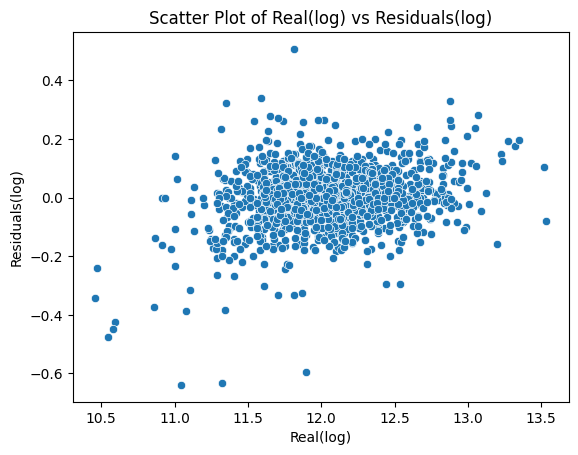

In [51]:
sub= Yreal_train - Ypred_train
result = np.column_stack(([ids_train, Yreal_train, sub]))
df_prueba = pd.DataFrame(result, columns=(["Id", "Real(log)","Residuals(log)"]))
sns.scatterplot(data=df_prueba, x="Real(log)", y="Residuals(log)")
# Customize the plot if needed

# Add labels to data points
#for line in range(0, df_prueba.shape[0]):
#    plt.text(df_prueba['Real(log)'].iloc[line], df_prueba['Residuals(log)'].iloc[line], df_prueba['Id'].iloc[line],
#        horizontalalignment='right', size='small', color='black')


plt.title(f'Scatter Plot of Real(log) vs Residuals(log)')
plt.show()

In [52]:
for col_name in []:
    hue_column = train[col_name]
    result = np.column_stack((ids_train, Yreal_train, sub, hue_column))
    df_prueba = pd.DataFrame(result, columns=(["Id", "Real(log)","Residuals(log)", col_name]))
    sns.scatterplot(data=df_prueba, x="Real(log)", y="Residuals(log)", hue=col_name,size=0.9)

    plt.title(f'Scatter Plot of Real(log) vs Residuals(log)')
    plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

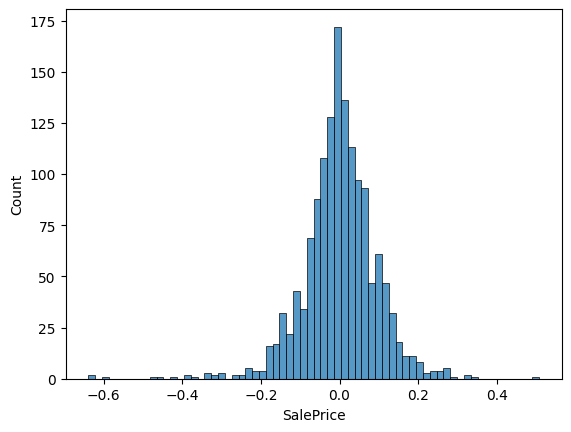

In [53]:

# Add labels to the bars

cols = np.column_stack((ids_train, sub))
df_prueba = pd.DataFrame(cols, columns=("Id", "Residuals(log)"))

sns.histplot(data=sub)

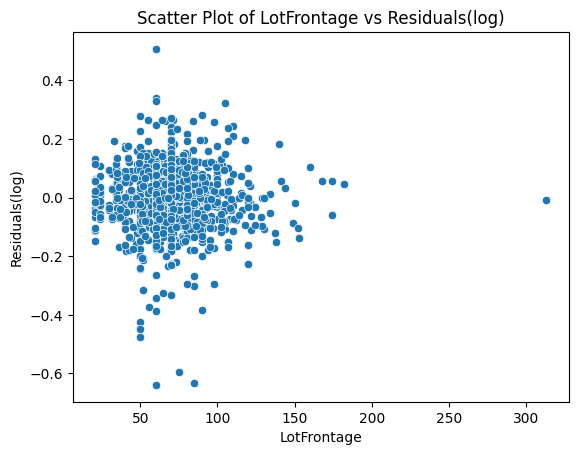

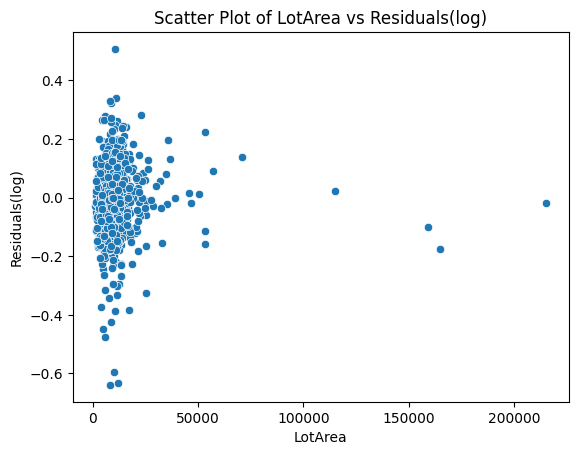

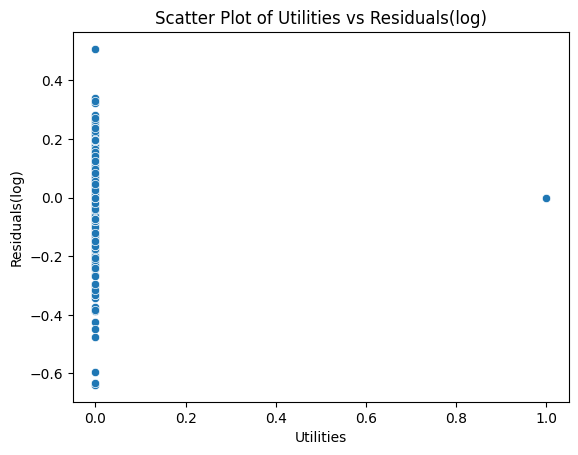

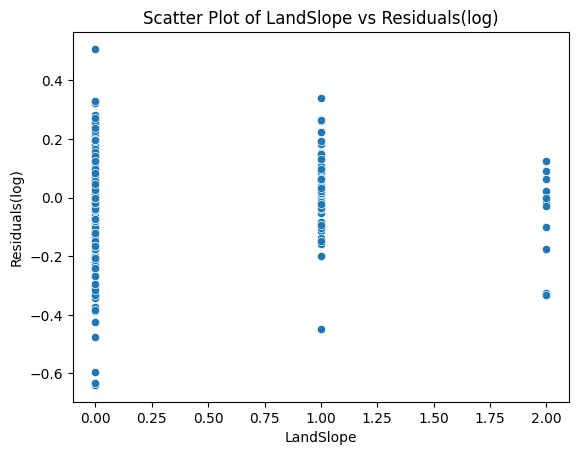

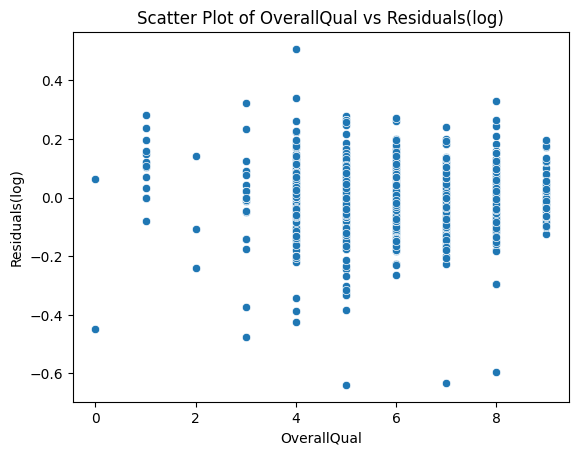

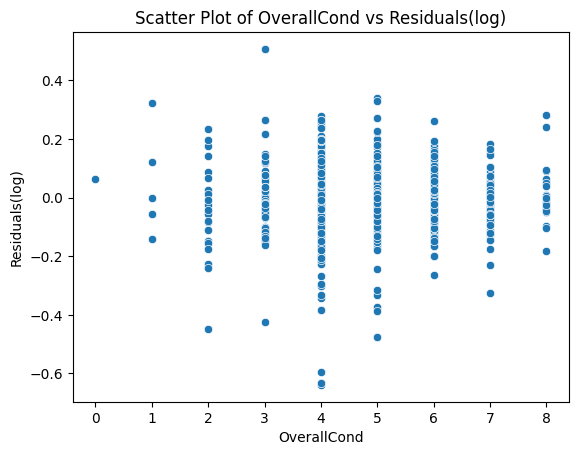

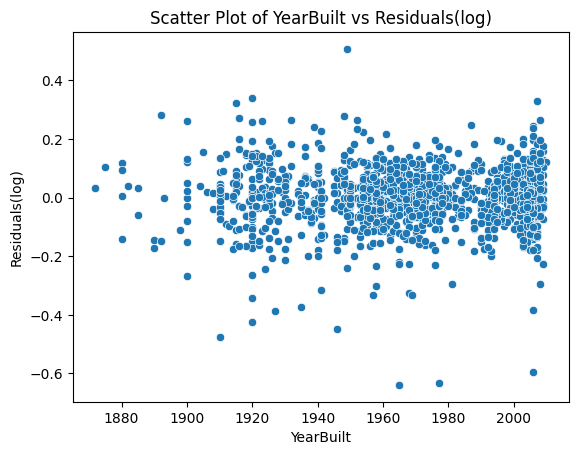

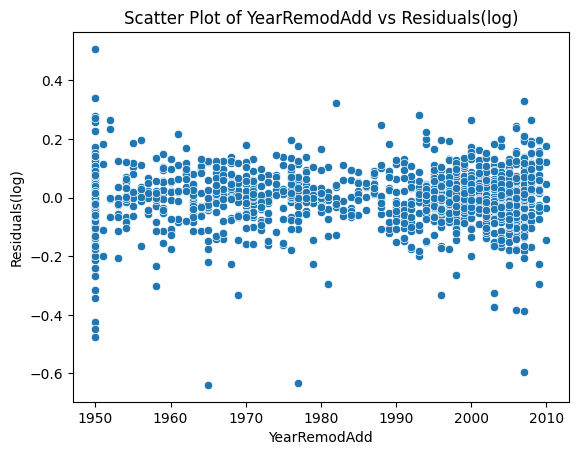

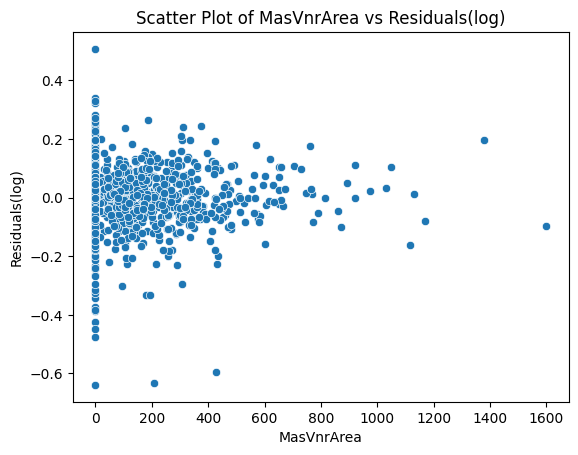

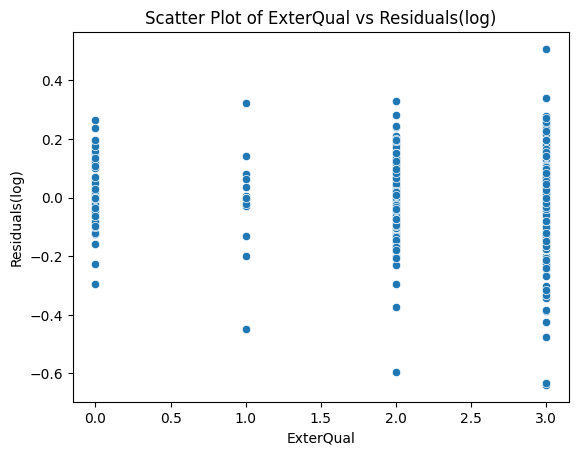

In [54]:
for c in train.columns:
    result = np.column_stack((train[c][:-1], sub[:-1]))
    df_prueba = pd.DataFrame(result, columns=(f"{c}","Residuals(log)"))
    sns.scatterplot(data=df_prueba, x=c, y="Residuals(log)")
    # Customize the plot if needed
    plt.title(f'Scatter Plot of {c} vs Residuals(log)')
    plt.show()

In [ ]:
model.pvalues

LotFrontage             8.478138e-04
LotArea                 1.006943e-05
Utilities               5.115803e-02
LandSlope               3.767879e-01
OverallQual             8.158310e-08
                            ...     
SaleCondition_Normal    1.620467e-01
LotShape_IR1            3.797508e-03
LotShape_IR2            2.976398e-03
LotShape_IR3            3.738393e-03
LotShape_Reg            3.537278e-03
Length: 226, dtype: float64

In [ ]:
X_test=test[X.columns]

#Ypred_test = lr1.predict(X_test)

Ypred_test = model.predict(X_test)

print("SHAPES")
print(f"X: {X.shape}, Yreal_train: {Yreal_train.shape}, Ypred_train {Ypred_train.shape}")


Ypred_test
result = np.column_stack([ids_test, np.exp(Ypred_test)])
rdf = pd.DataFrame(result, columns=("Id","SalePrice"))
rdf['Id'] = rdf['Id'].astype(int)
rdf.to_csv('pruebafinal2_OLS_out.csv', index=False) 

SHAPES
X: (1458, 226), Yreal_train: (1458,), Ypred_train (1458,)


In [ ]:
X_test

,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,80.0,11622,0,0,5,5,1961,1961,0.0,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,81.0,14267,0,0,6,5,1958,1958,108.0,3,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,74.0,13830,0,0,5,4,1997,1998,0.0,3,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,78.0,9978,0,0,6,5,1998,1998,20.0,3,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,43.0,5005,0,0,8,4,1992,1992,0.0,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,0,0,4,6,1970,1970,0.0,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1455,21.0,1894,0,0,4,4,1970,1970,0.0,3,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,160.0,20000,0,0,5,6,1960,1996,0.0,3,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,62.0,10441,0,0,5,4,1992,1992,0.0,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
